## Project Details
#### Apply K-Means clustering to segment customers based on their purchase behavior.
#### Description - Use Natural Language Processing (NLP) techniques to preprocess text data and build a sentiment analysis model.
#### Technologies-Python, Pandas, NLTK or SpaCy.

In [14]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

import warnings
warnings.filterwarnings("ignore")


# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Step 2: Create Sample Dataset
data = StringIO("""
review,sentiment
"This movie was absolutely fantastic! I loved every minute.",positive
"It was a boring movie. Not recommended.",negative
"An excellent performance by the actors.",positive
"Terrible plot and poor direction. Waste of time.",negative
"Just okay. Some good moments but overall average.",negative
"A masterpiece. Truly inspiring and emotional.",positive
""")

df = pd.read_csv(data)
df.head()


,review,sentiment
0,This movie was absolutely fantastic! I loved e...,positive
1,It was a boring movie. Not recommended.,negative
2,An excellent performance by the actors.,positive
3,Terrible plot and poor direction. Waste of time.,negative
4,Just okay. Some good moments but overall average.,negative


In [16]:
# Step 3: Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    words = text.lower().split()
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['review'].apply(preprocess)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df['label']

0    1
1    0
2    1
3    0
4    0
5    1
Name: label, dtype: int64

In [17]:
# Step 4: Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['label']
y

0    1
1    0
2    1
3    0
4    0
5    1
Name: label, dtype: int64

In [18]:
# Step 5: Train-Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([1, 1], dtype=int64)

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



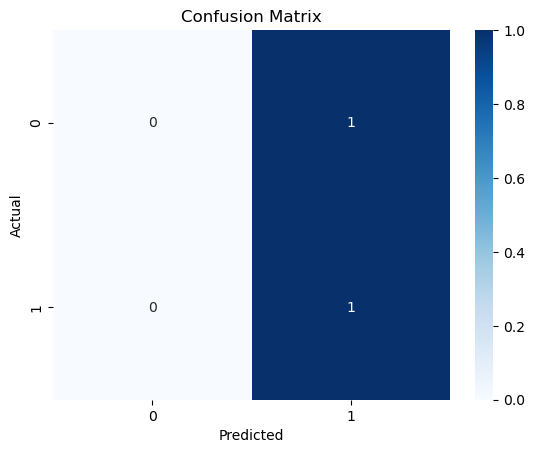

In [19]:
# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
